
# Adding Limit Orders to the Trading Bot (Take Profit & Stop Loss) 

In [1]:
import sys
sys.path.append("../")
from trading.api import OANDA_API
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timedelta, timezone
import time
import pytz
from datetime import datetime

import matplotlib.pyplot as plt
from trading import MyTT

In [2]:
instrument = "EUR_USD"
bar_length = timedelta(minutes = 1)
SMA = 200
dev = 2

In [3]:
# raw_data = None
# now = datetime.utcnow()
       
# now = now - timedelta(microseconds = now.microsecond)
# past = now - timedelta(days = 2)


# print (f"Getting candles for {instrument}, from {past} to {now}")

# raw_df = tpqoa.tpqoa("../../config/oanda_demo.cfg").get_history(instrument = instrument, start = past, end = now,
#                        granularity = "S30", price = "M", localize = True).c.dropna().to_frame()

# raw_df.rename(columns = {"c":instrument}, inplace = True)


# # last_bar = raw_data.index[-1].to_pydatetime().replace(tzinfo=None)
        

In [4]:
# raw_df = pd.read_pickle(f"../../data/backtest_{instrument}.pcl")

In [17]:
api = OANDA_API("../../config/oanda.cfg")
raw_df = api.get_history_with_all_prices(instrument, 10)

In [18]:
raw_df

,ask,bid,EUR_USD
time,,,
2024-02-12 22:29:00,1.07765,1.07703,1.077340
2024-02-12 22:29:30,1.07737,1.07700,1.077185
2024-02-12 22:30:00,1.07741,1.07702,1.077215
2024-02-12 22:30:30,1.07738,1.07705,1.077215
2024-02-12 22:31:00,1.07730,1.07700,1.077150
...,...,...,...
2024-02-22 22:27:00,1.08254,1.08214,1.082340
2024-02-22 22:27:30,1.08254,1.08214,1.082340
2024-02-22 22:28:00,1.08250,1.08213,1.082315


In [19]:
df = raw_df.copy()
    
df["SMA"] = df[instrument].rolling(SMA).mean()
std = df[instrument].rolling(SMA).std() * dev
df["std"] = df[instrument].rolling(60).std()
df["std_sma"] = df["std"].rolling(60).mean()

df["Lower"] = df["SMA"] - std
df["Upper"] = df["SMA"] + std

df


,ask,bid,EUR_USD,SMA,std,std_sma,Lower,Upper
time,,,,,,,,
2024-02-12 22:29:00,1.07765,1.07703,1.077340,NaN,NaN,NaN,NaN,NaN
2024-02-12 22:29:30,1.07737,1.07700,1.077185,NaN,NaN,NaN,NaN,NaN
2024-02-12 22:30:00,1.07741,1.07702,1.077215,NaN,NaN,NaN,NaN,NaN
2024-02-12 22:30:30,1.07738,1.07705,1.077215,NaN,NaN,NaN,NaN,NaN
2024-02-12 22:31:00,1.07730,1.07700,1.077150,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-02-22 22:27:00,1.08254,1.08214,1.082340,1.082196,0.000035,0.00005,1.081937,1.082454
2024-02-22 22:27:30,1.08254,1.08214,1.082340,1.082198,0.000035,0.00005,1.081941,1.082454
2024-02-22 22:28:00,1.08250,1.08213,1.082315,1.082200,0.000035,0.00005,1.081946,1.082453


In [20]:
df.tail(20)

,ask,bid,EUR_USD,SMA,std,std_sma,Lower,Upper
time,,,,,,,,
2024-02-22 22:17:00,1.08248,1.08227,1.082375,1.082185,0.000052,0.000051,1.081937,1.082434
2024-02-22 22:17:30,1.08241,1.08227,1.082340,1.082186,0.000052,0.000051,1.081936,1.082435
2024-02-22 22:18:00,1.08244,1.08227,1.082355,1.082187,0.000052,0.000051,1.081936,1.082437
2024-02-22 22:19:30,1.08244,1.08226,1.082350,1.082187,0.000051,0.000051,1.081936,1.082439
2024-02-22 22:20:00,1.08244,1.08230,1.082370,1.082188,0.000050,0.000051,1.081935,1.082441
2024-02-22 22:21:00,1.08244,1.08225,1.082345,1.082189,0.000050,0.000051,1.081935,1.082442
2024-02-22 22:21:30,1.08243,1.08225,1.082340,1.082189,0.000049,0.000051,1.081935,1.082444
2024-02-22 22:22:30,1.08243,1.08227,1.082350,1.082190,0.000046,0.000051,1.081934,1.082445
2024-02-22 22:23:00,1.08242,1.08227,1.082345,1.082191,0.000043,0.000051,1.081934,1.082447


In [26]:
filtered_df = df.query("time >= '2024-02-22 21:00:00' and time < '2024-02-22 22:00:00'")

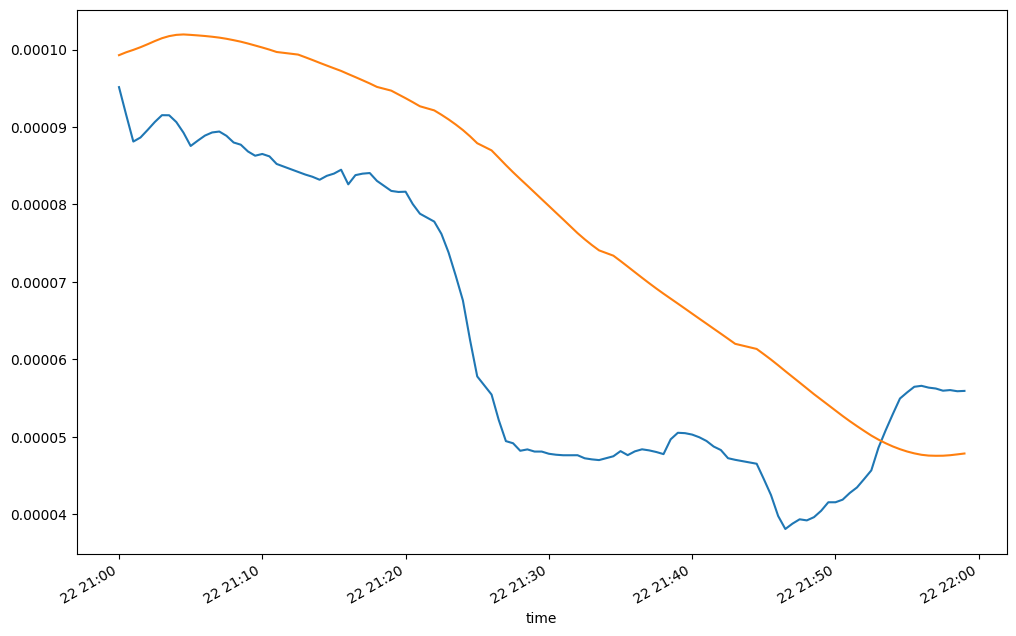

In [27]:
# filtered_df[instrument].plot(figsize = (12, 8))
filtered_df["std"].plot(figsize = (12, 8))
filtered_df["std_sma"].plot(figsize = (12, 8))
# filtered_df["std_upper"].plot(figsize = (12, 8), secondary_y = "position")
# filtered_df["std_lower"].plot(figsize = (12, 8), secondary_y = "position")

plt.show()

In [28]:
# M = filtered_df["SMA"].values
# M = pd.Series(M)
# poly = np.polyfit(M.index, M.values, deg=1)
# poly
slope = MyTT.SLOPE(filtered_df[instrument].values)
slope = round(slope, 6)
slope

2e-06

In [29]:
'{0:f}'.format(slope)

'0.000002'

In [ ]:
filtered_df[instrument].plot(figsize = (12, 8))
filtered_df["SMA"].plot(figsize = (12, 8))